<a href="https://colab.research.google.com/github/edmenciab733/ecc_qiskit_fallfest/blob/main/ecc_qiskit_fallfest_ejercicio2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
!pip install qiskit
!pip install pylatexenc
!pip install qiskit-aer

In [2]:
from  qiskit import QuantumCircuit

In [22]:
def bernstein_vazirani(string_):

    # Save the length of string
    string_length = len(string_)

    # Make a quantum circuit
    qc = QuantumCircuit(string_length+1, string_length)

    # Initialize each input qubit to apply a Hadamard gate and output qubit to |->

    for i in range(string_length + 1):
       if i == string_length:
          qc.x(i)
       qc.h(i)
    qc.barrier()
    #
    #
    # build your code here
    #
    #

    # Apply an oracle for the given string
    # Note: In Qiskit, numbers are assigned to the bits in a string from right to left
    for i in range(string_length):
      if string_[i] == "1":
        qc.cx(i, int(string_length))
      else:
        qc.i(i)
    #
    #
    # build your code here
    #
    #
    qc.barrier()
    # Apply Hadamard gates after querying the oracle
    for i in range(string_length + 1):
       qc.h(i)
    #
    #
    # build your code here
    #
    #

    # Measurement
    qc.measure(range(string_length), range(string_length))

    return qc

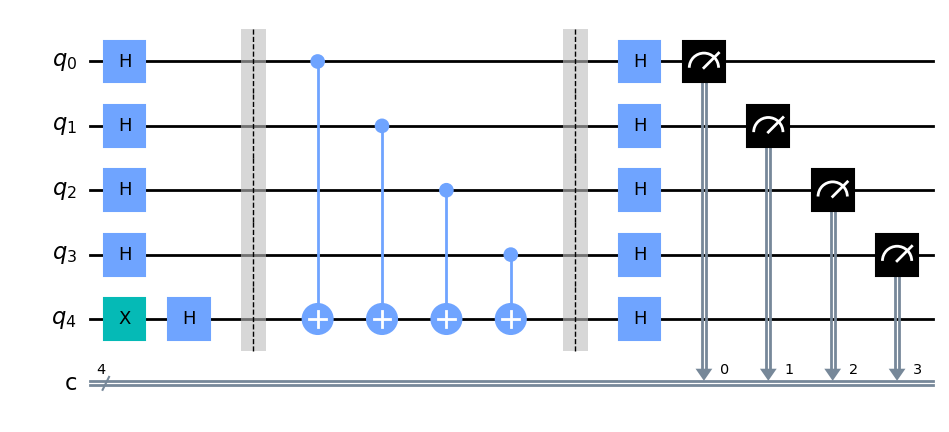

In [33]:
qc1 = bernstein_vazirani('1111')
display(qc1.draw(output="mpl"))

In [34]:
from  qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import IBMQ, Aer, execute
from qiskit.visualization import plot_histogram
%matplotlib inline

In [37]:
def execute(circuit):
  simulador = Aer.get_backend('aer_simulator')
  job = simulador.run(circuit, shots=1000)
  result = job.result()
  count = result.get_counts()
  return plot_histogram(count)

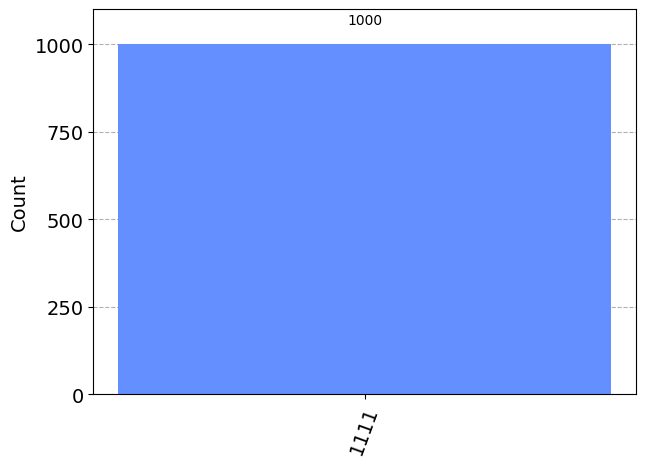

In [38]:
execute(qc1)